# My Project
This project is about ML system that will be able to predict doctor appointmets lenght based on patient age, medical records, visti reason and more.

Link for data set:
https://www.kaggle.com/datasets/danielapitosi/clinic-visit-time/data


# Prepare


In [ ]:
! kaggle datasets download -d danielapitosi/clinic-visit-time
! apt-get install unzip
! unzip clinic-visit-time.zip

Dataset URL: https://www.kaggle.com/datasets/danielapitosi/clinic-visit-time
License(s): unknown
  0% 0.00/72.3k [00:00<?, ?B/s]
100% 72.3k/72.3k [00:00<00:00, 43.5MB/s]
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Archive:  clinic-visit-time.zip
  inflating: AI_project_data_set.csv  


In [ ]:
# prepare the system:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dateutil import parser

In [ ]:
#Loading the data set
df = pd.read_csv('AI_project_data_set.csv', skipinitialspace = True)

In [ ]:
#checking for not null values:
null_value_stats=df.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

,0
medical_records,2377


In [ ]:
#print fitures
df.columns

Index(['patients_ids', 'gender', 'birth', 'medical_records', 'visit_date',
       'visit_type', 'visit_reason', 'visit_estimated_time', 'visit_real_time',
       'doctor_type'],
      dtype='object')

# Level 1 - Preseting the data (basicly)
will create some basicly graphs , based on the data in order to get a clearer information about what we have in that data fare.

A. A graph of appointemnt types vs. how many instances we have for any appoitmet type

B. A graph of appointemnts lengths vs. how many instances we have for any appointmetn length

C. A graph of Reason For Visit - only Follow up visits

D. A graph that present how many appointmets there were in any month during 2021

E. A graph that preent how much time the visit took vs. the estimated time


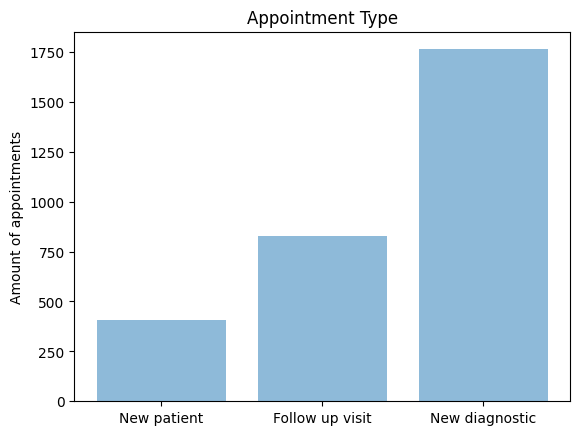

In [ ]:
# A graph of appointemnt types vs. how many instances we have for any appoitmet types
u,c=np.unique(df.visit_type, return_counts=True)
sorted_indices = np.argsort(c)
u_sorted = u[sorted_indices]
c_sorted = c[sorted_indices]

y_pos = np.arange(len(u_sorted))

plt.bar(y_pos, c_sorted, align='center', alpha=0.5)
plt.xticks(y_pos, u_sorted)
plt.ylabel('Amount of appointments')
plt.title('Appointment Type')

plt.show()


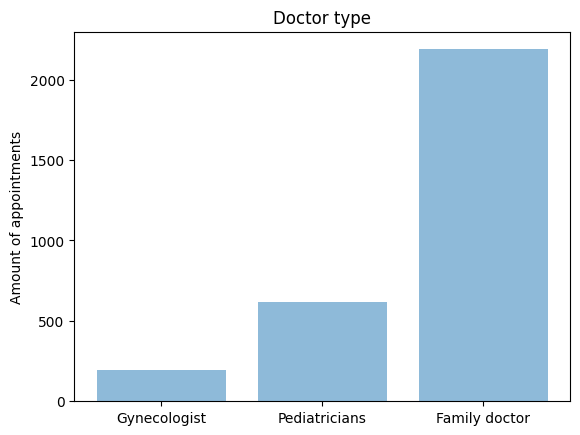

In [ ]:
# A graph of doctor type vs. how many instances we have for any appoitmet types
u,c=np.unique(df.doctor_type, return_counts=True)

sorted_indices = np.argsort(c)
u_sorted = u[sorted_indices]
c_sorted = c[sorted_indices]

y_pos = np.arange(len(u_sorted))

# יצירת הגרף
plt.bar(y_pos, c_sorted, align='center', alpha=0.5)
plt.xticks(y_pos, u_sorted)
plt.ylabel('Amount of appointments')
plt.title('Doctor type')

plt.show()

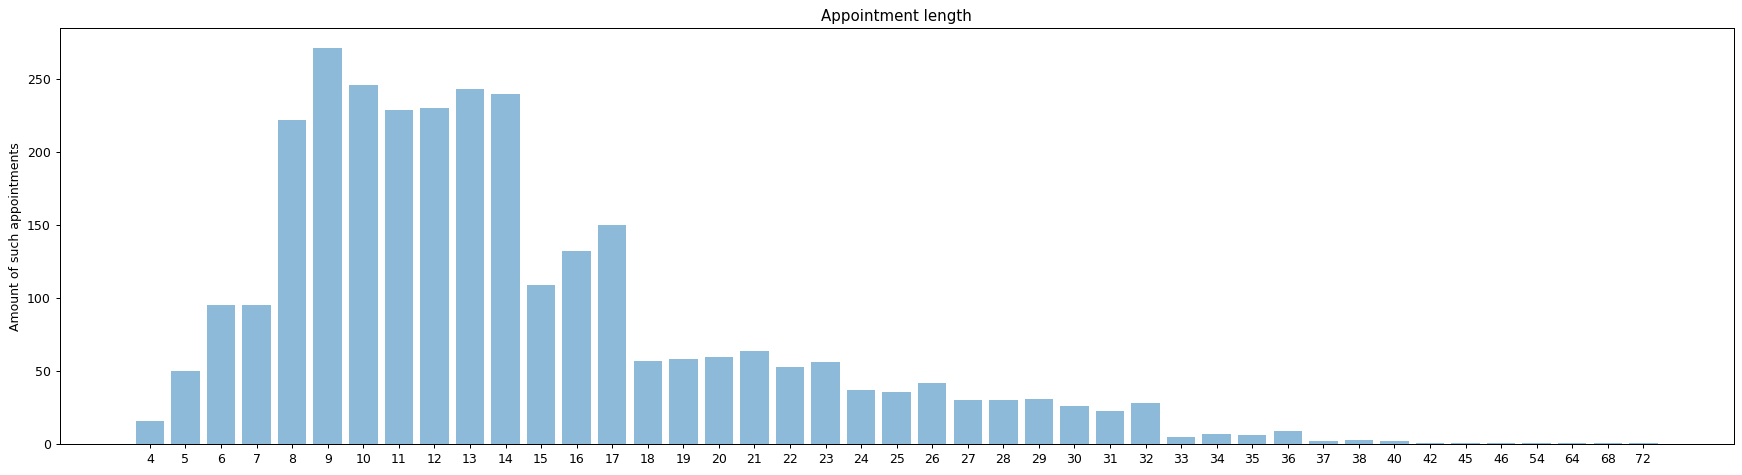

In [ ]:
#A graph of appointemnts lengths vs. how many instances we have for any appointmetn length
plt.figure(figsize=(24, 6), dpi=90)
visit_real_time=df.visit_real_time
u,c=np.unique(visit_real_time, return_counts=True)
y_pos = np.arange(len(u))

plt.bar(y_pos, c, align='center', alpha=0.5)
plt.xticks(y_pos, u)
plt.ylabel('Amount of such appointments')
plt.title('Appointment length')

plt.show()

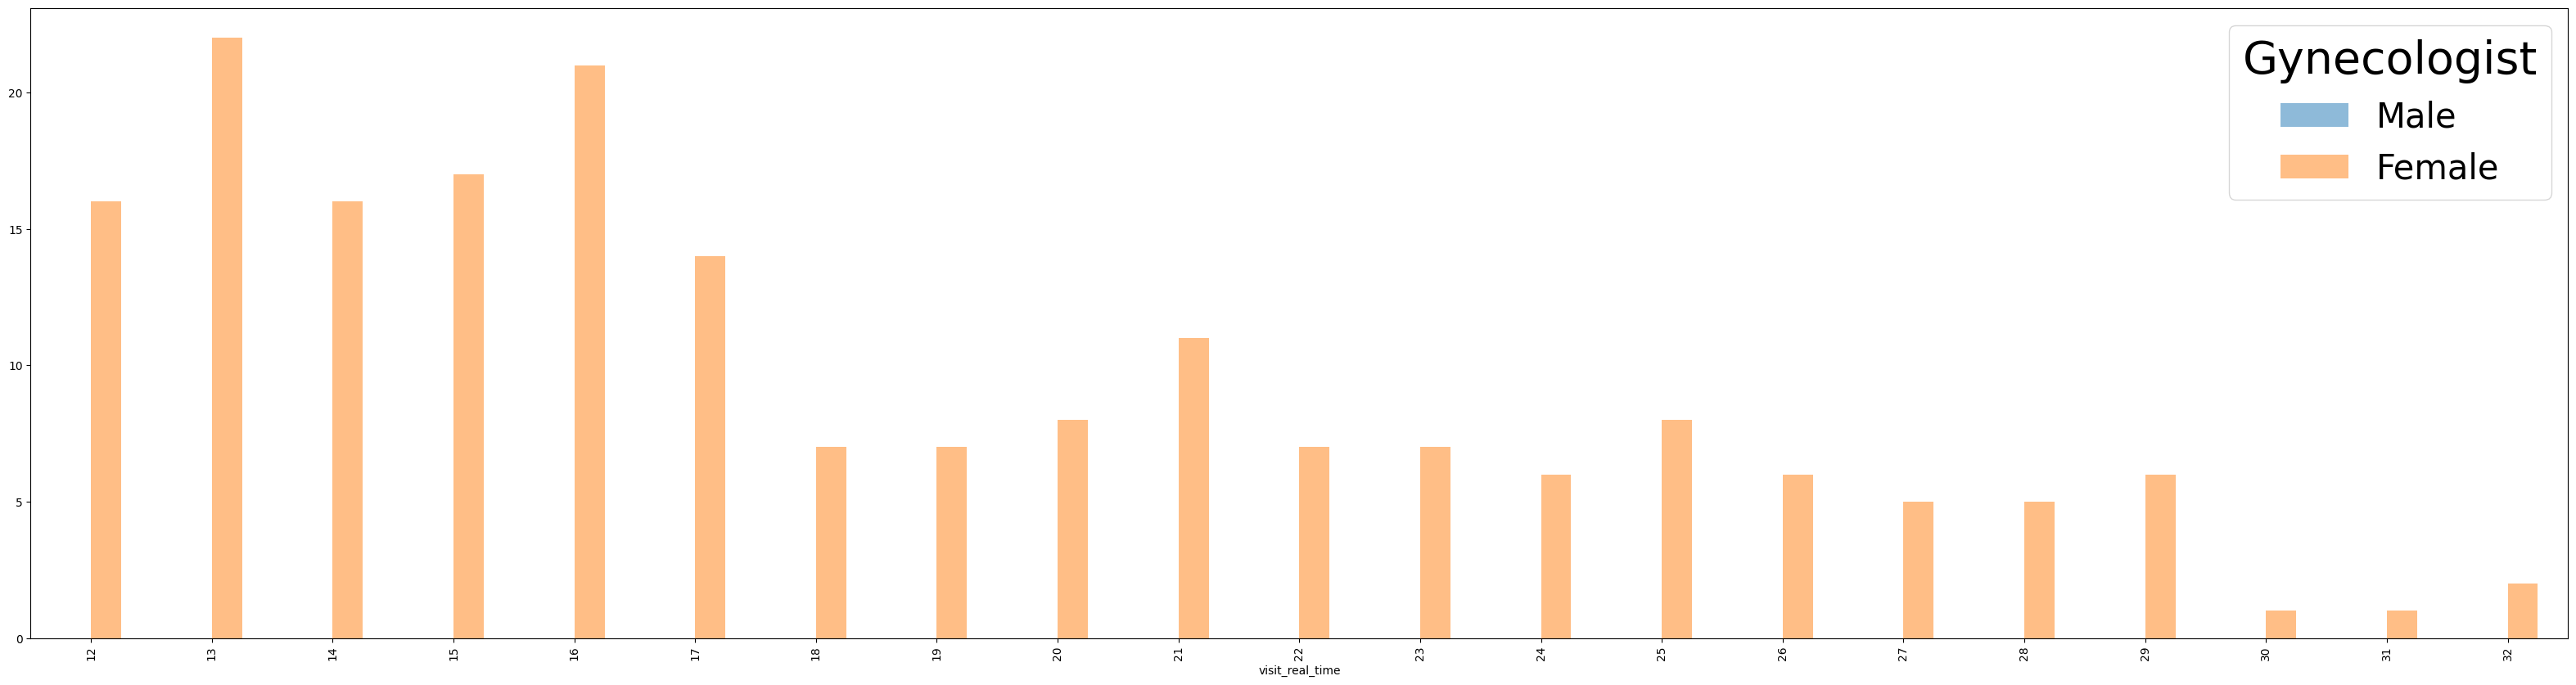

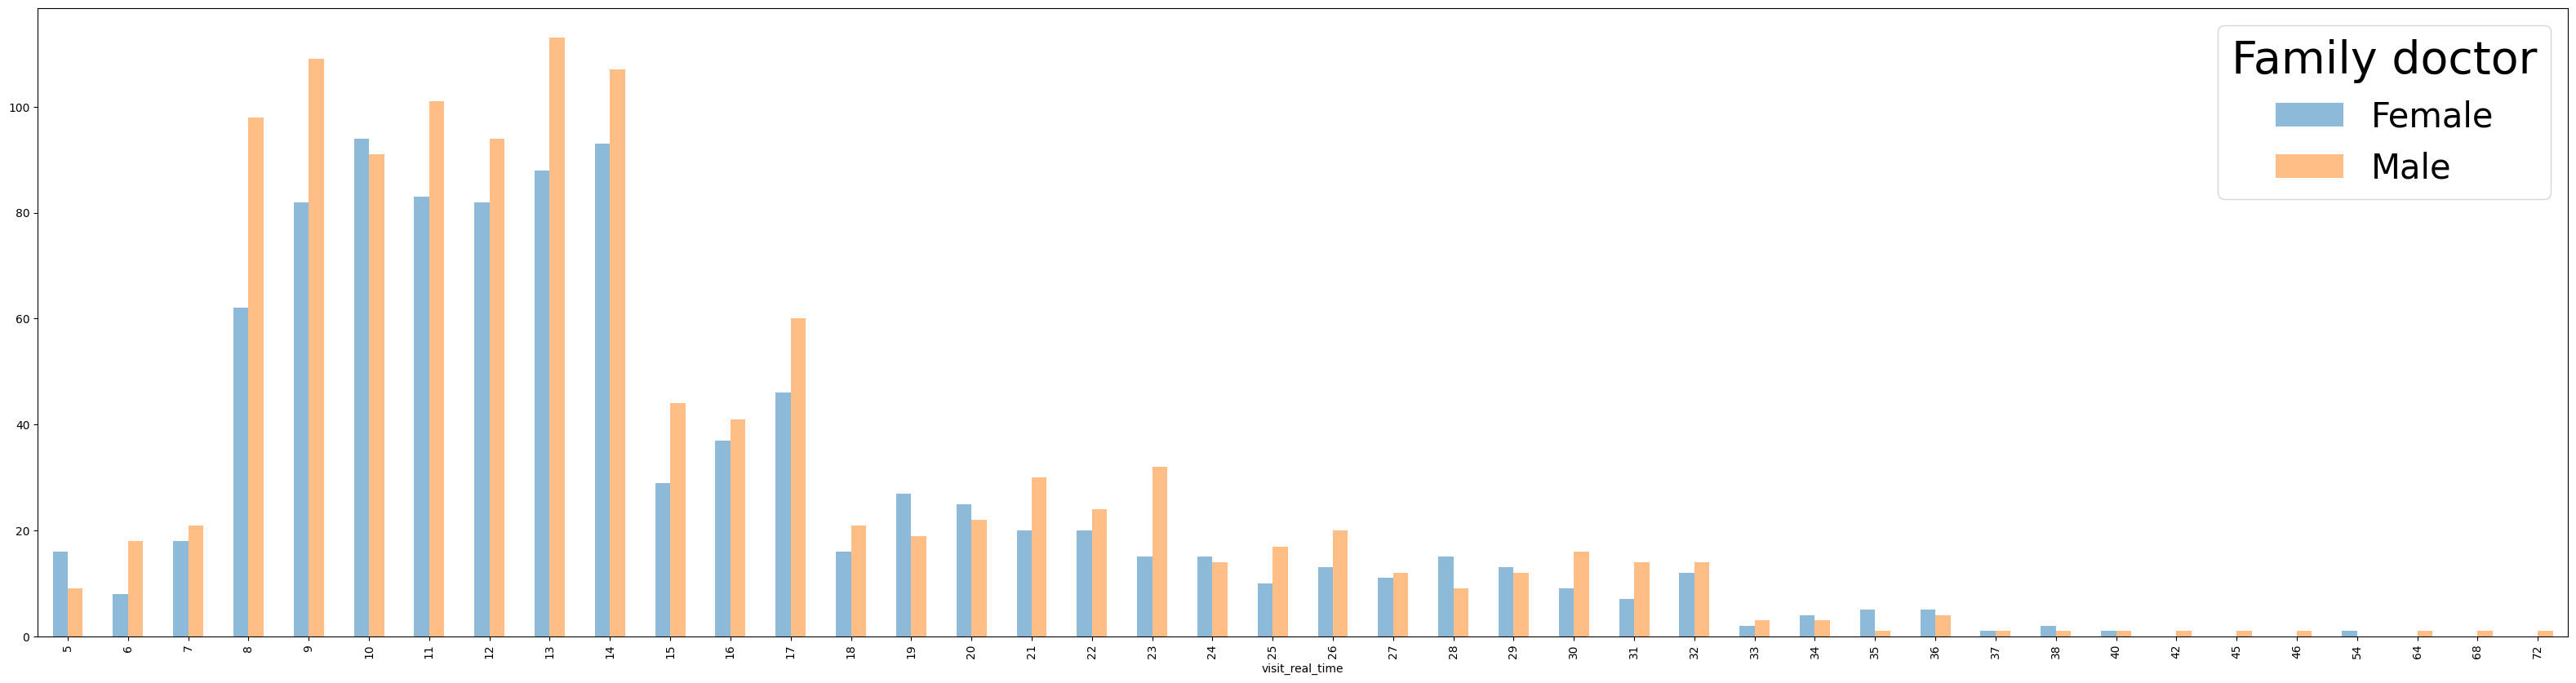

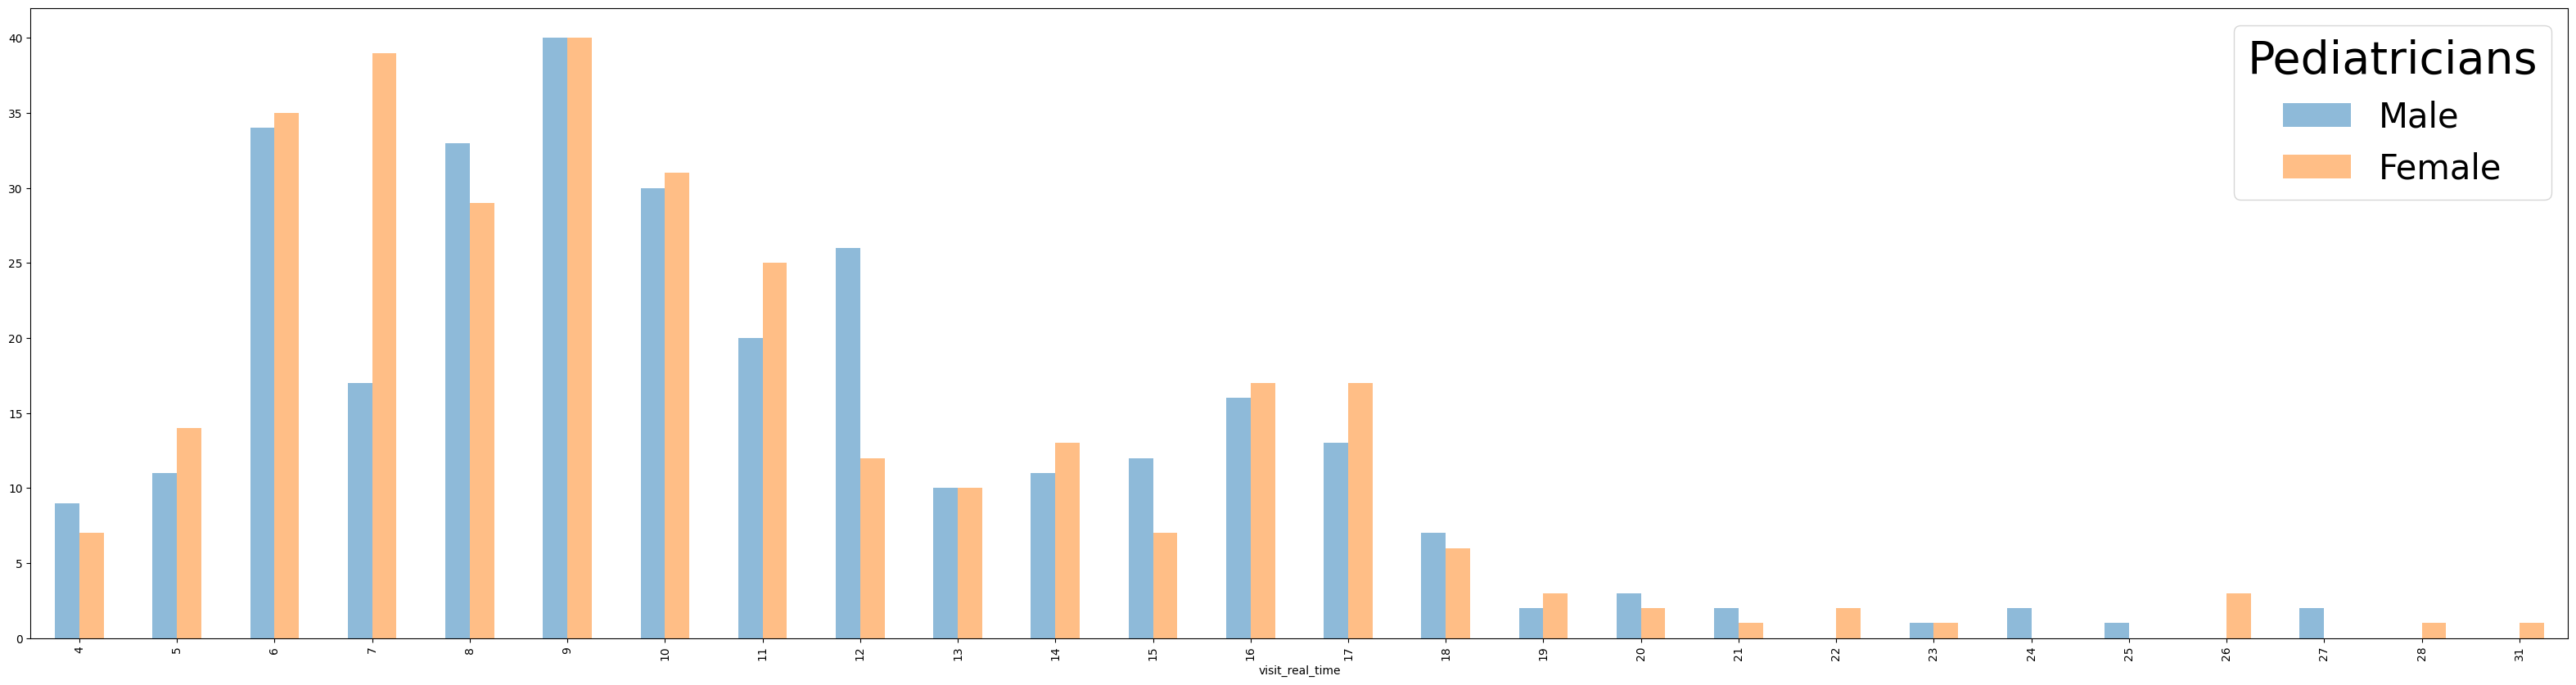

In [ ]:
y= list(range(0 ,df.visit_real_time.max()+1))


for d in df.doctor_type.unique():
    x = {}
    for g in df.gender.unique():
        values = {y_val: 0 for y_val in y}
        for res in df.loc[(df.doctor_type == d) & (df.gender == g), 'visit_real_time']:
            values[res] += 1
        x[f'{g}'] = list(values.values())

    new = pd.DataFrame.from_dict(x)
    new['visit_real_time'] = y

    new_filtered = new[(new.drop(columns=['visit_real_time']) != 0).any(axis=1)]

    sorted_columns = new_filtered.drop(columns=['visit_real_time']).sum(axis=0).sort_values().index.tolist()
    sorted_columns.append('visit_real_time')

    new_filtered = new_filtered[sorted_columns]

    new_filtered.plot(x="visit_real_time", y=sorted_columns[:-1], kind="bar", align='center', alpha=0.5, figsize=(40, 10), width=0.5)

    # Increase legend size
    plt.legend(fontsize='30',
               title=d,
               title_fontsize='40')

plt.show()

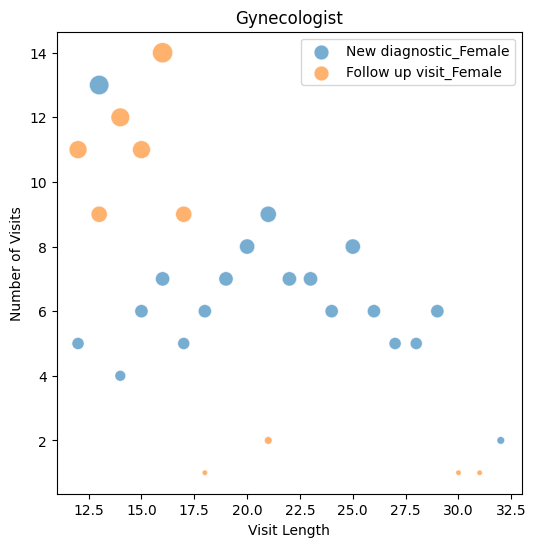

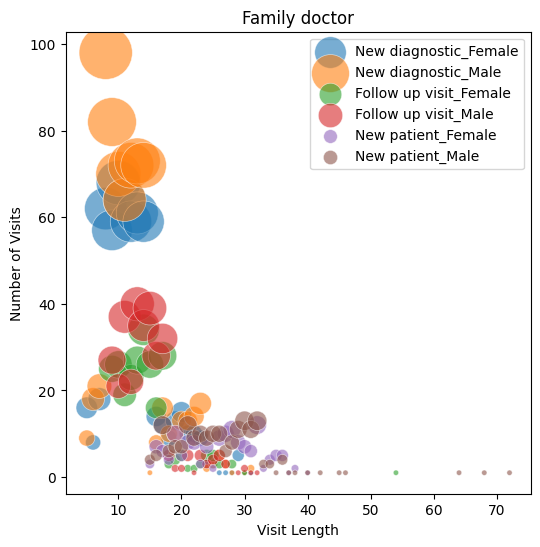

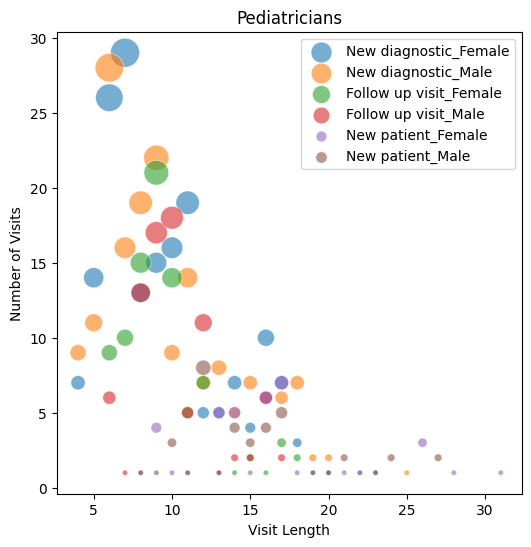

In [ ]:
y = list(range(0, df.visit_real_time.max() + 1))

doctor_types = df.doctor_type.unique()
v_type = df.visit_type.unique()
genders = df.gender.unique()

for d in doctor_types:
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(d)
    ax.set_xlabel('Visit Length')
    ax.set_ylabel('Number of Visits')

    # Dictionary to store legend handles
    legend_handles = []

    for vt in v_type:
        for g in genders:
            values = {y_val: 0 for y_val in y}
            for res in [df.visit_real_time[i] for i in range(len(df)) if df.doctor_type[i] == d and df.gender[i] == g and df.visit_type[i] == vt]:
                values[res] += 1
            final = {k: v for k, v in values.items() if v != 0}
            if final:
                sizes = [v * 15 for v in final.values()]  # Scale factor for point sizes
                scatter = ax.scatter(final.keys(), final.values(), s=sizes, alpha=0.6, edgecolors='w', linewidth=0.5, label=f'{vt}_{g}')
                legend_handles.append(scatter)

    # Add custom legend
    ax.legend(handles=legend_handles,  scatterpoints=1)

    plt.show()

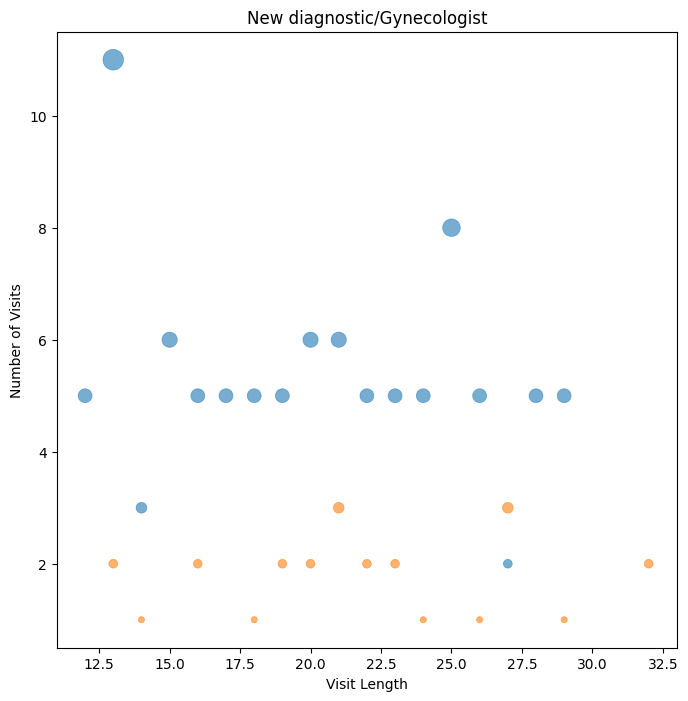

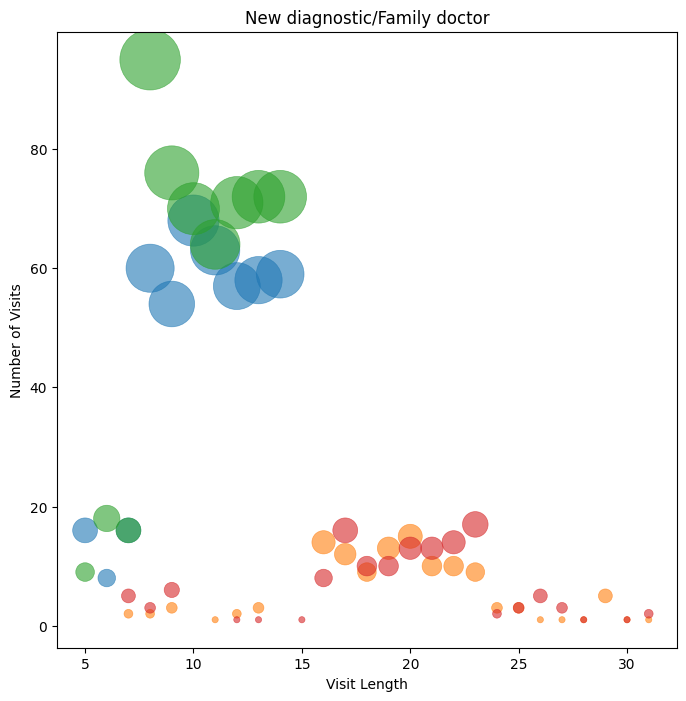

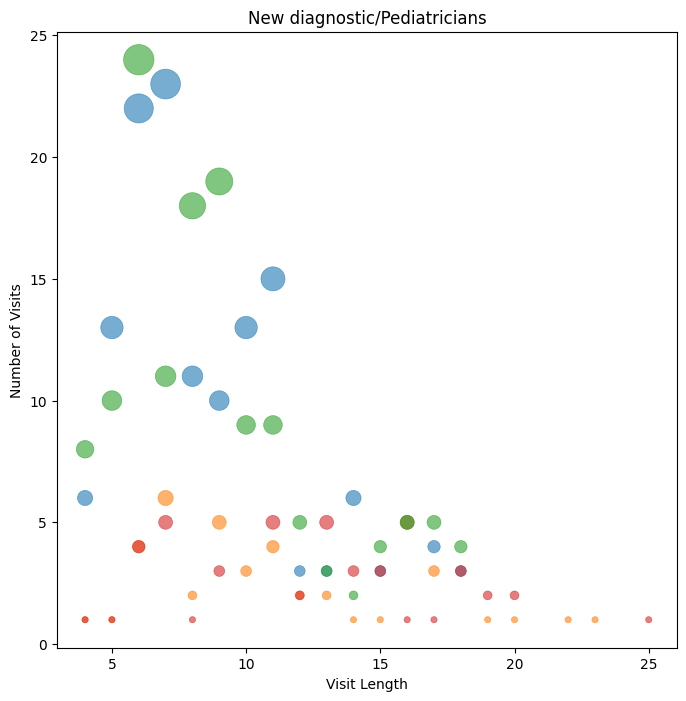

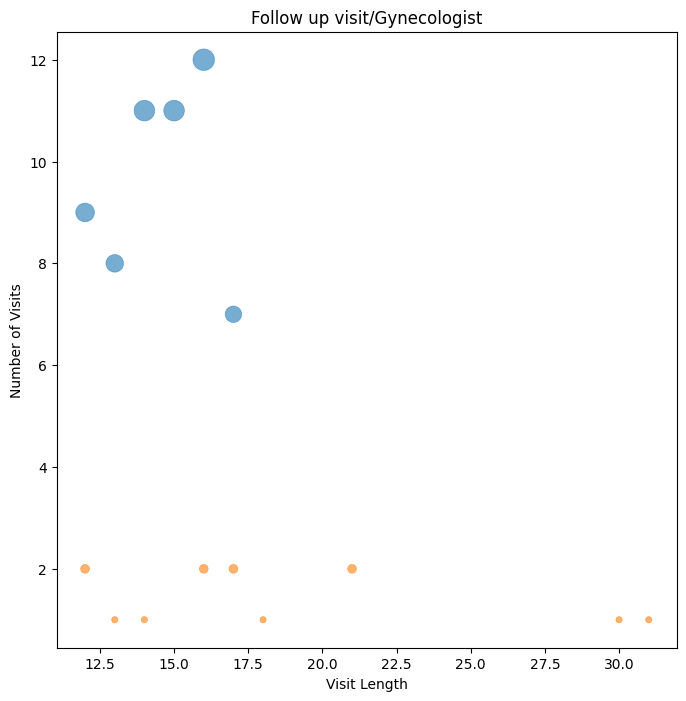

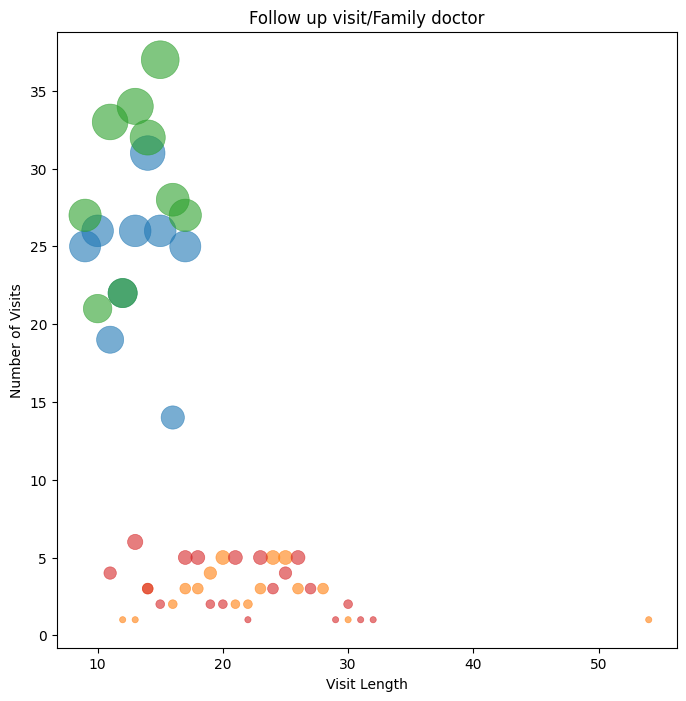

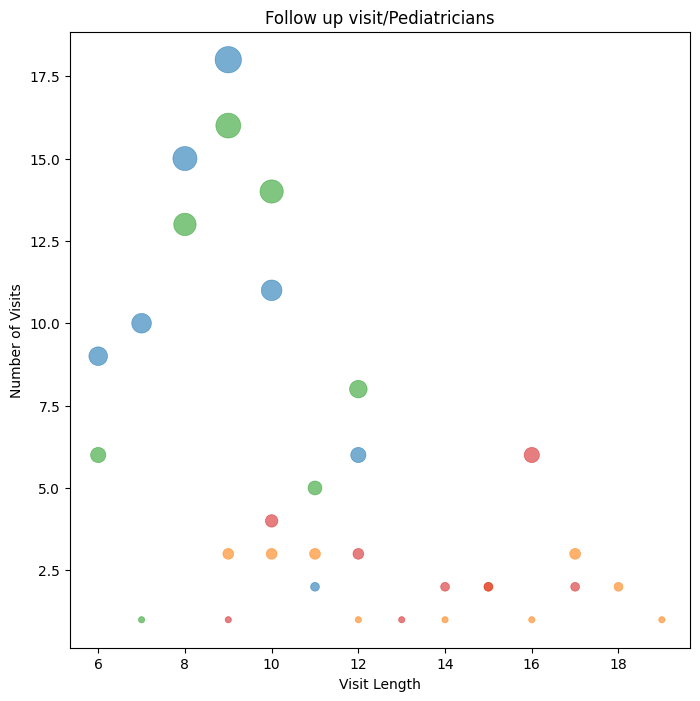

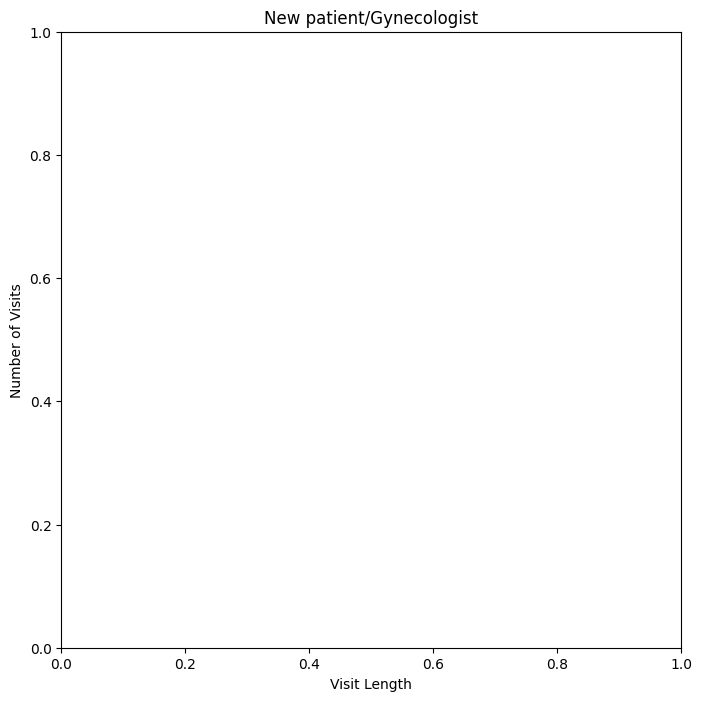

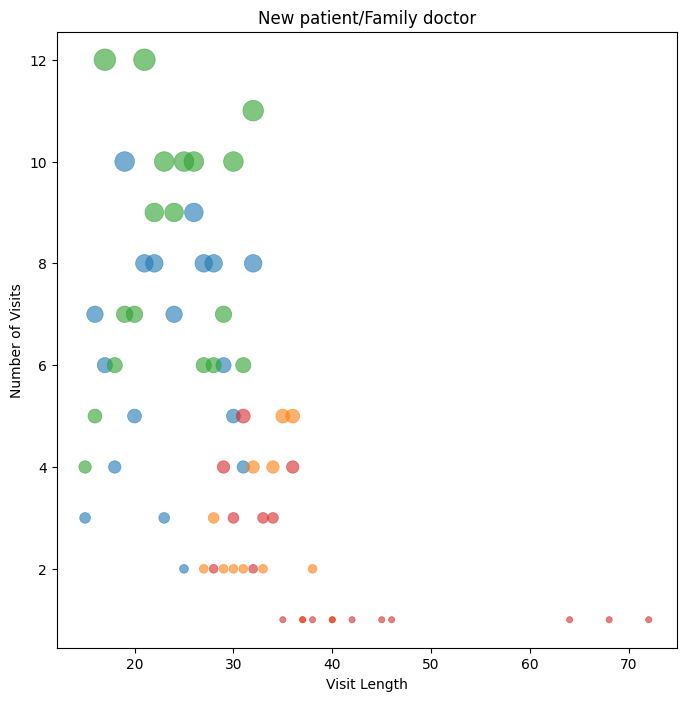

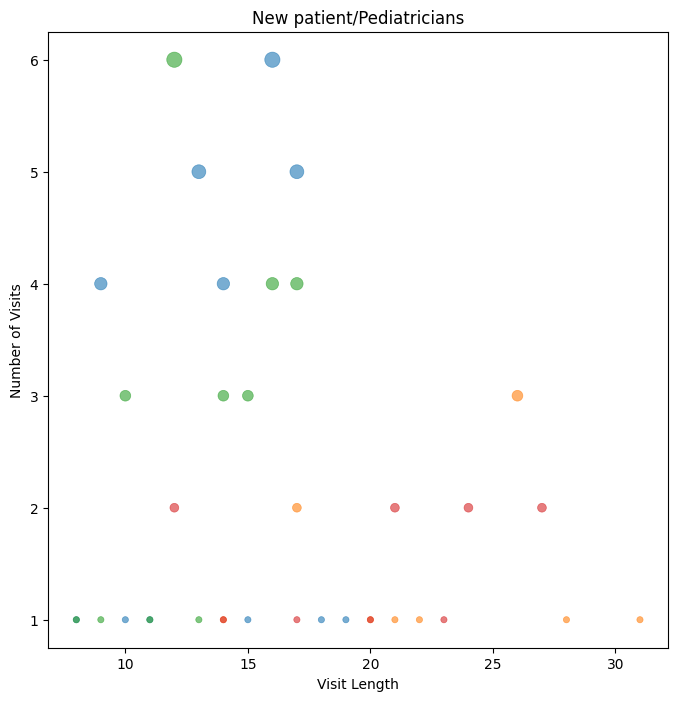

In [ ]:

# יצירת רשימת ערכי y לכל אורכי הביקורים
y = list(range(0, df.visit_real_time.max() + 1))

# רשימת סוגי הרופאים, סוגי הביקורים והג'נדרים הייחודיים
doctor_types = df.doctor_type.unique()
v_type = df.visit_type.unique()
genders = df.gender.unique()

doctor_map={''}
# עבור כל סוג ביקור
for vt in v_type:
  # עבור כל סוג רופא וכל ג'נדר
  for d in doctor_types:
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title(f'{vt}/{d}')
    ax.set_xlabel('Visit Length')
    ax.set_ylabel('Number of Visits')

    legend_handles = []
    for g in genders:
      values_wo_mr = {y_val: 0 for y_val in y}
      values_w_mr = {y_val: 0 for y_val in y}

      # חישוב מספר המופעים של כל אורך ביקור עם וללא רשומות רפואיות
      for i in range(len(df)):
          if df.doctor_type[i] == d and df.gender[i] == g and df.visit_type[i] == vt:
              visit_length = df.visit_real_time[i]
              medical_record = str(df.medical_records[i])

              if medical_record == 'nan':
                  values_wo_mr[visit_length] += 1
              else:
                  values_w_mr[visit_length] += 1

      # סינון ערכים לא אפסיים
      final_wo = {k: v for k, v in values_wo_mr.items() if v != 0}
      final_w = {k: v for k, v in values_w_mr.items() if v != 0}

      # הצגת נקודות על הגרף, גודל הנקודות בהתאם למספר המופעים
      if final_wo:
          sizes_wo = [v * 20 for v in final_wo.values()]  # גורם הכפלה לגודל הנקודות
          scatter_wo = ax.scatter(final_wo.keys(), final_wo.values(), s=sizes_wo, alpha=0.6, linewidth=0.5, label=f'{d}_{g}_wo_mr')
          legend_handles.append((scatter_wo, f'{d}_{g}_wo_mr'))

      if final_w:
          sizes_w = [v * 20 for v in final_w.values()]  # גורם הכפלה לגודל הנקודות
          scatter_w = ax.scatter(final_w.keys(), final_w.values(), s=sizes_w, alpha=0.6, linewidth=0.5, label=f'{g}_w_mr')
          legend_handles.append((scatter_w, f'{g}_w_mr'))

    # הוספת הלג'נד לגרף
    #handles, labels = zip(*legend_handles)
    #ax.legend(handles, labels, scatterpoints=1)

    plt.show()

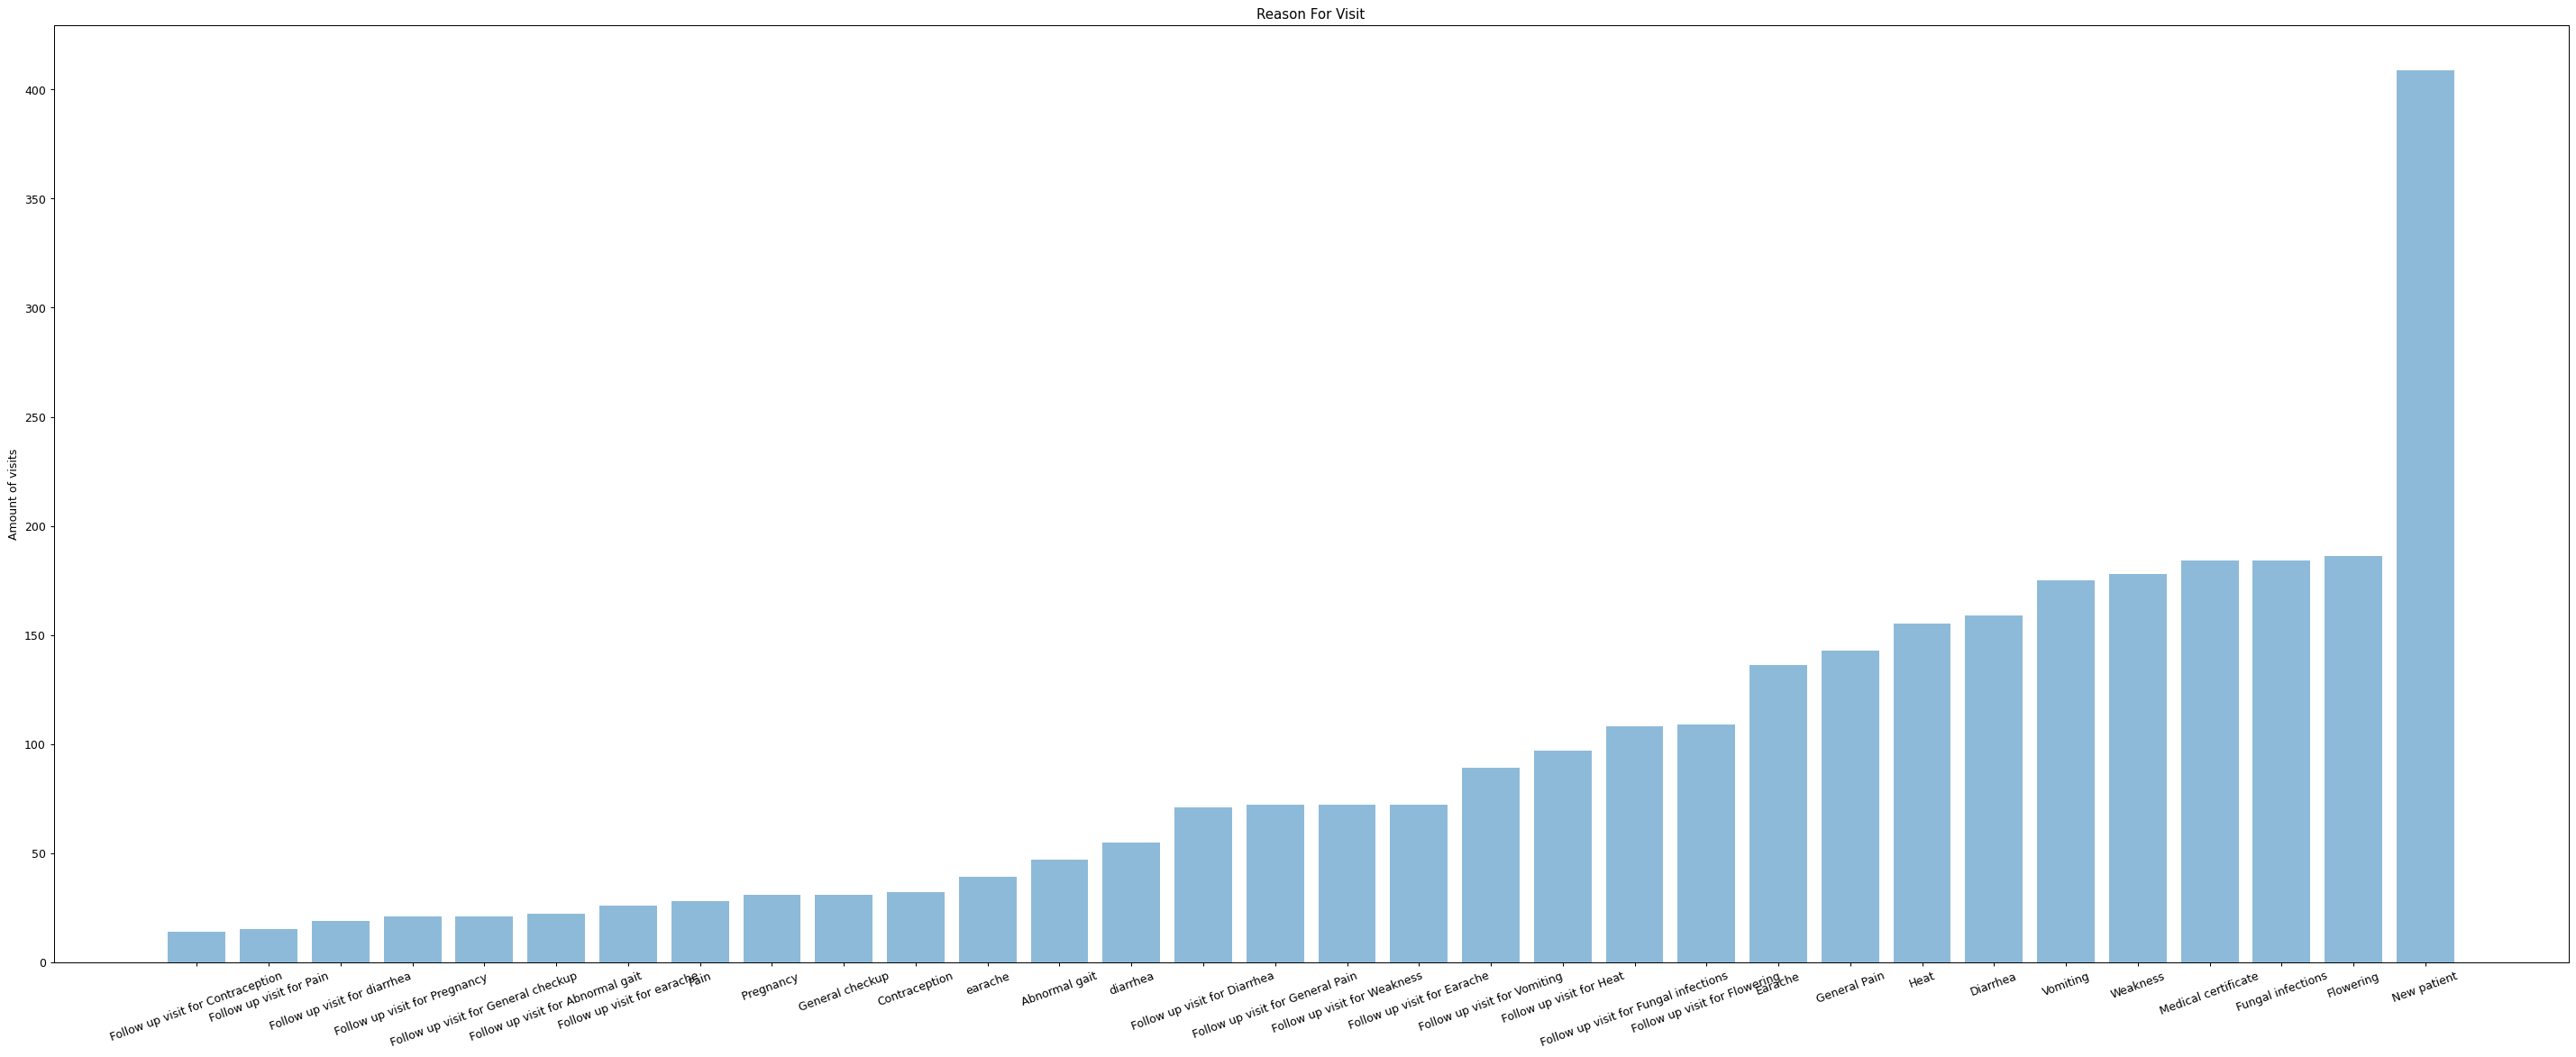

In [ ]:
# Assuming df is your DataFrame
u, c = np.unique(df.visit_reason, return_counts=True)

# Sort the values by the counts
sorted_indices = np.argsort(c)
u_sorted = u[sorted_indices]
c_sorted = c[sorted_indices]

y_pos = np.arange(len(u_sorted))

plt.figure(figsize=(40, 10), dpi=90)
plt.bar(y_pos, c_sorted, align='center', alpha=0.5)

plt.xticks(y_pos, u_sorted)
plt.ylabel('Amount of visits')
plt.title('Reason For Visit')
plt.xticks(rotation=20)

plt.show()

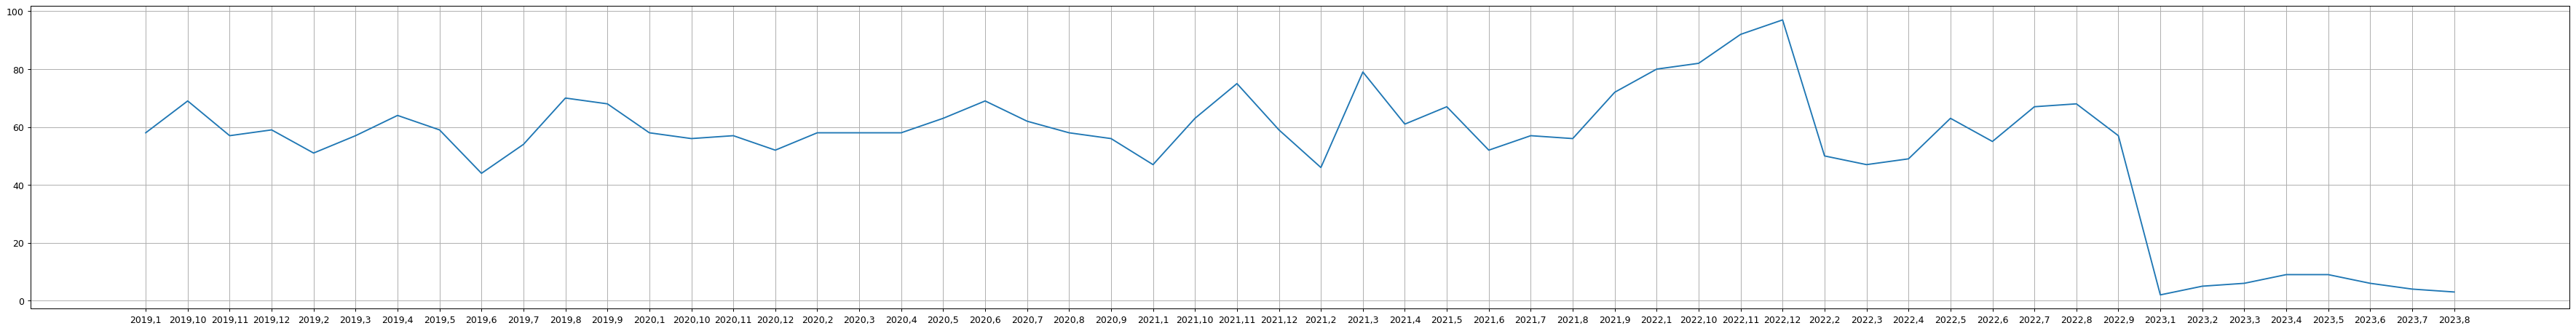

In [ ]:
# A graph that present how many appointmets there were in any year/month
from matplotlib.pyplot import figure
from dateutil import parser
from datetime import datetime
figure(figsize=(50, 6), dpi=90)

app_type=df.visit_date
x=[f"{parser.parse(d).year},{parser.parse(d).month}" for d in app_type ]

u,c=np.unique(x, return_counts=True)
# Create a line plot
plt.plot(u, c)
plt.grid(True)
# Show the plot
plt.show()

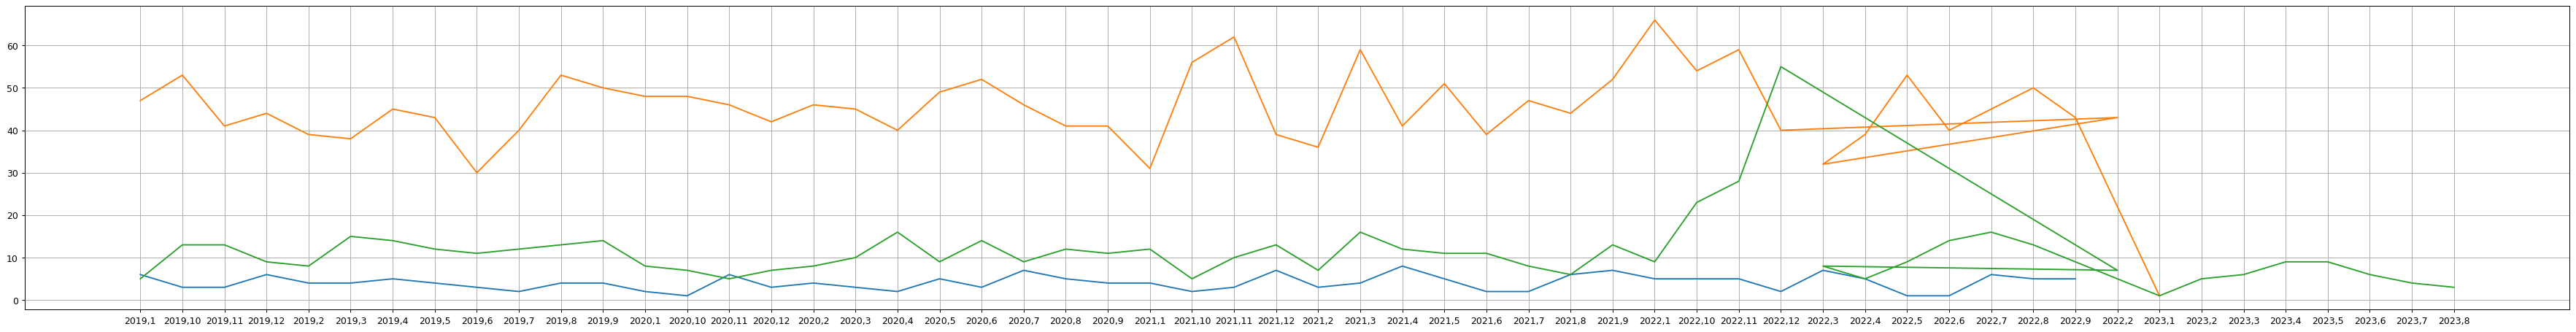

In [ ]:
# A graph that present how many appointmets there were in any year/month, ordered by doctor type
from matplotlib.pyplot import figure
from dateutil import parser
from datetime import datetime
figure(figsize=(50, 6), dpi=90)

for dt in df.doctor_type.unique():
  df_copy=df
  df_for_specific_doc=df_copy.drop(df_copy.loc[df_copy.doctor_type != dt].index)
  app_type=df_for_specific_doc.visit_date
  x=[f"{parser.parse(d).year},{parser.parse(d).month}" for d in app_type ]
  u,c=np.unique(x, return_counts=True)
  plt.plot(u, c)
plt.grid(True)
# Show the plot
plt.show()

# Level 2 - fixing the data frame:
Will do some changes in the featuers of the data frame

A. Adding a feature for the patient age (in years) in the visit date

B. Converting gender into binary value

C. Splitting medical records into separated feature (with binary value)

In [ ]:
df = pd.read_csv('AI_project_data_set.csv', sep=',',  skipinitialspace = True)

In [ ]:
#creating a copy of the original data frame
updated_df=df
updated_df.columns

Index(['patients_ids', 'gender', 'birth', 'medical_records', 'visit_date',
       'visit_type', 'visit_reason', 'visit_estimated_time', 'visit_real_time',
       'doctor_type'],
      dtype='object')

In [ ]:
#Removing unecessery data
for f in ['patients_ids', 'visit_estimated_time']:
  updated_df.drop(f, axis=1, inplace=True)

In [ ]:
#Adding a feature of age in the visit
def get_year(date:str) -> int :
  return int(date.split(" ")[0].split("-")[0])

visit_dates=[get_year(visit_date) for visit_date in df.visit_date]
births=[get_year(birth) for birth in df.birth]

updated_df['Age_in_visit'] = [visit_dates[i]-births[i] for i in range(len(births))]

#remove wrong data - in which the age of the patient in the visit was lower than 0
updated_df.drop(updated_df.loc[updated_df.Age_in_visit < 0].index, inplace=True)
updated_df.drop('birth', axis=1, inplace=True)

In [ ]:
#Converting gender into binary value:
updated_df.gender =  [ 1 if g == "Female" else 0 for g in updated_df.gender]

In [ ]:
#converting doctor type into numeric value:
doctor_types=updated_df.doctor_type.unique()
doctor_types_dict={doctor_types[i]:i for i in range(len(doctor_types))}
df_doctor_types=[dt for dt in df.doctor_type]

updated_df['doctor_code'] = [doctor_types_dict[d] for d in df_doctor_types]

updated_df.drop('doctor_type', axis=1, inplace=True)

In [ ]:
#converting visit type into numerci value:
visit_types=updated_df.visit_type.unique()
visit_types_dict={visit_types[i]:i for i in range(len(visit_types))}

df_visit_types=[vt for vt in df.visit_type]

updated_df['visit_code'] = [visit_types_dict[vt] for vt in df_visit_types]

updated_df.drop('visit_type', axis=1, inplace=True)

In [ ]:
#Splitting medical records into separated feature (with binary value)
#seting this as we get some wornings abot updating the data frame values
pd.options.mode.chained_assignment = None

#Converting null values to null stirngs
updated_df.medical_records.fillna(" ", inplace=True)

medical_records=[]
#Adding a feture for any medical record
for m_r in set(updated_df['medical_records'].str.split(',').values.sum()):
  if str(m_r) and m_r.replace(" ","") not in medical_records:
    medical_records.append(m_r.replace(" ",""))

#For any istance in our data frame - push medical records information into the right fetures.
for condition in medical_records:
    updated_df[condition.replace(" ","")] = updated_df['medical_records'].apply(lambda x: 1 if condition in x.replace(" ","") else 0)

updated_df.drop("", axis=1, inplace=True)
updated_df.drop('medical_records', axis=1, inplace=True)

In [ ]:
#Splitting visit reason into separated feature (with binary value)
#seting this as we get some wornings abot updating the data frame values
pd.options.mode.chained_assignment = None

#Converting null values to null stirngs
updated_df.visit_reason.fillna("", inplace=True)

visit_r_types=updated_df.visit_reason.unique()
visit_r_dict={visit_r_types[i]:i for i in range(len(visit_r_types))}
df_visit_r=[dt for dt in df.visit_reason]

updated_df['visit_reason_code'] = [visit_r_dict[d] for d in df_visit_r]


updated_df.drop('visit_reason', axis=1, inplace=True)

In [ ]:
updated_df.drop('visit_date', axis=1, inplace=True)

In [ ]:
#remove wrong data - in which the age of the patient in the visit was lower than 0
updated_df.drop(updated_df.loc[updated_df.Age_in_visit < 0].index, inplace=True)


In [ ]:
null_value_stats=updated_df.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

,0


In [ ]:
updated_df

,gender,visit_real_time,Age_in_visit,doctor_code,visit_code,SesameAllergy,PeanutsAllergy,Diabetes,Celiac,ASD,MilkAllergy,Alzheimer,Cancer,EggsAllergy,Dyspnea,Smoking,Amputated,Mentalretardation,Parkinson,visit_reason_code
0,1,26,76,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1,16,70,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,0,18,74,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2
3,0,17,68,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,3
4,1,35,73,1,2,0,0,0,1,0,0,0,0,0,0,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,0,18,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22
2996,1,18,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2997,1,8,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2998,0,15,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


# Level 2.5- Present results better

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [ ]:
updated_df.columns

Index(['gender', 'visit_real_time', 'Age_in_visit', 'doctor_code',
       'visit_code', 'SesameAllergy', 'PeanutsAllergy', 'Diabetes', 'Celiac',
       'ASD', 'MilkAllergy', 'Alzheimer', 'Cancer', 'EggsAllergy', 'Dyspnea',
       'Smoking', 'Amputated', 'Mentalretardation', 'Parkinson',
       'visit_reason_code'],
      dtype='object')

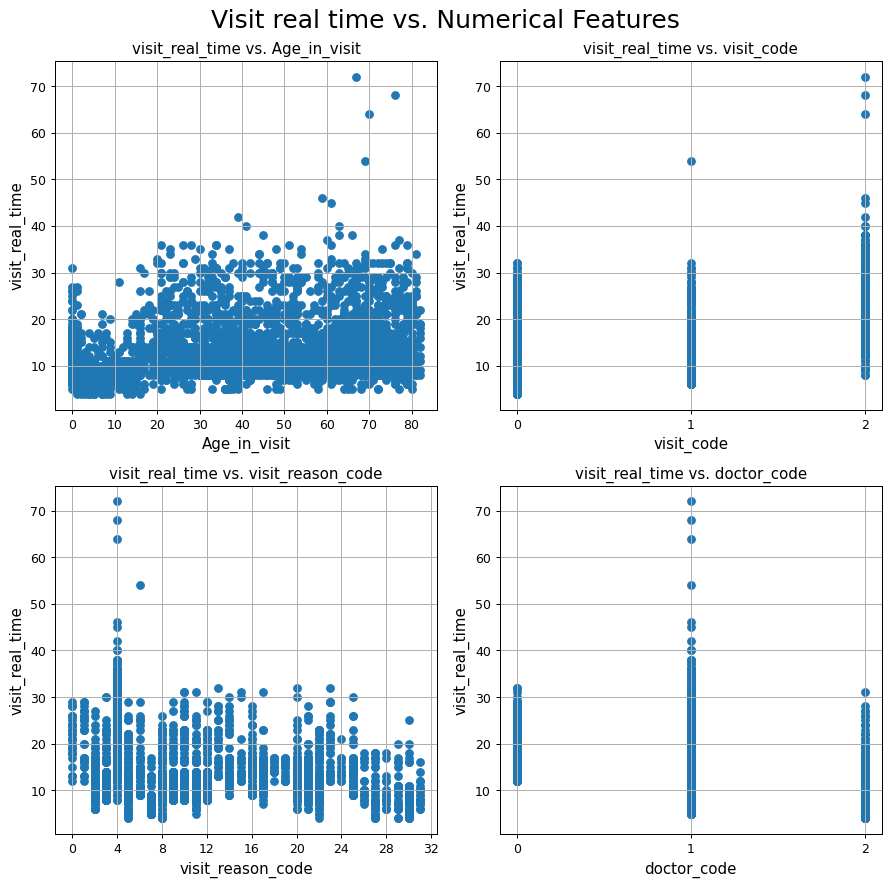

In [ ]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi=90)
num_features = ['Age_in_visit', 'visit_code', 'visit_reason_code', 'doctor_code']
target = 'visit_real_time'

for i in range(len(num_features)):
    row = i // 2
    col = i % 2
    ax[row, col]=sns.boxplot(x=num_features[i], y=target, data=updated_df)
    ax[row, col].set_title('{} vs. {}'.format(target, num_features[i]), size=12)
    ax[row, col].set_xlabel(num_features[i], size=12)
    ax[row, col].set_ylabel(target, size=12)
    ax[row, col].grid()

    ax[row, col].xaxis.set_major_locator(MaxNLocator(integer=True))

plt.suptitle('Visit real time vs. Numerical Features', size=20)
plt.tight_layout()
plt.show()

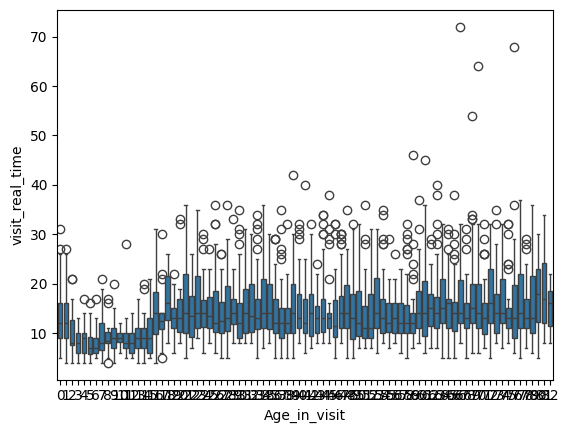

In [ ]:
target = 'visit_real_time'
sns.boxplot(x='Age_in_visit', y=target, data=updated_df)

plt.show()

TypeError: lmplot() got an unexpected keyword argument 'annot'

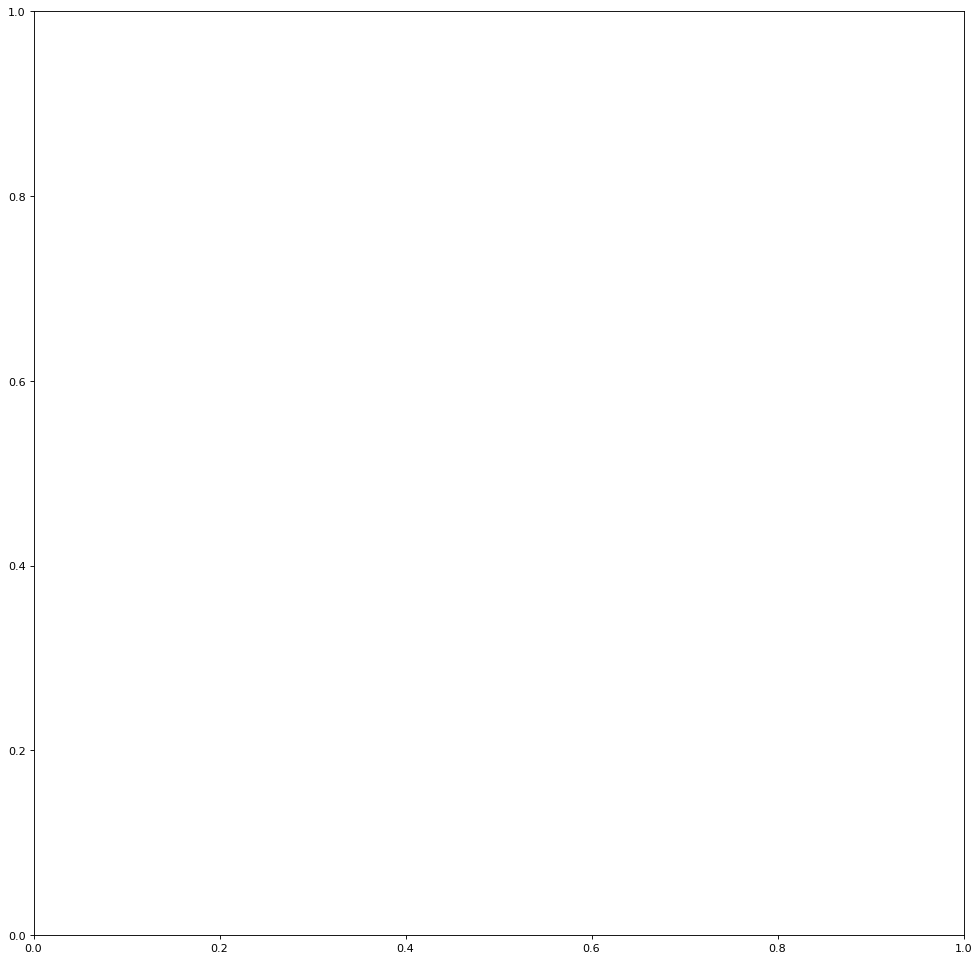

In [ ]:
target = 'visit_real_time'
cmap = sns.light_palette("#79C")
fig, ax = plt.subplots(figsize=(15, 15), dpi=80)
ax = sns.heatmap(pd.concat([updated_df.drop(target,axis=1),
                            updated_df[target]],
                           axis=1).corr(),
                 annot=True,
                 fmt=".1f",
                 cmap=cmap)
plt.show()

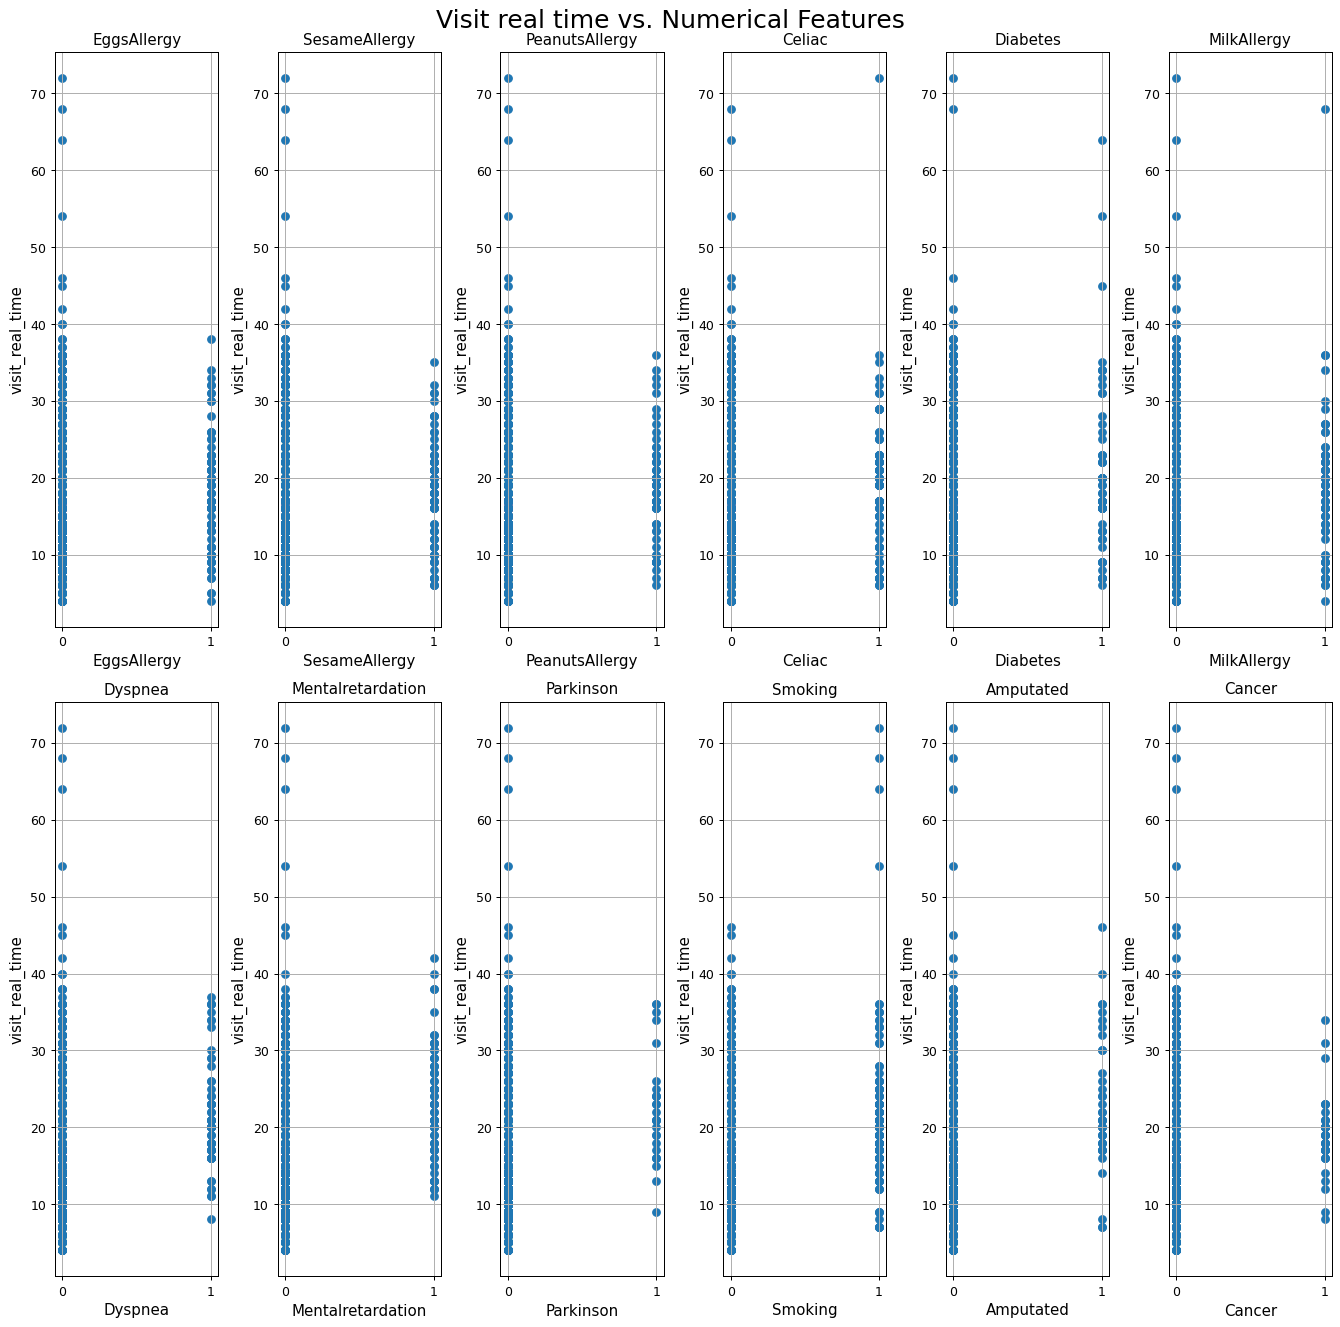

In [ ]:
num_features = ['EggsAllergy',
                'SesameAllergy',
                'PeanutsAllergy',
                'Celiac',
                'Diabetes',
                'MilkAllergy',
                'Dyspnea',
                'Mentalretardation',
                'Parkinson',
                'Smoking',
                'Amputated',
                'Cancer']

fig, ax = plt.subplots(nrows=2 ,ncols=6, figsize=(15,15), dpi=90)

target = 'visit_real_time'

for i in range(len(num_features)):
    row = i//6
    col = i%6
    ax[row,col].scatter(updated_df[num_features[i]], updated_df[target])
    ax[row,col].set_title('{}'.format(num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()
    ax[row, col].xaxis.set_major_locator(MaxNLocator(integer=True))


plt.suptitle('Visit real time vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

# Level 3- Trainig

In [ ]:
!pip install scikit-learn

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LinearRegression

X = updated_df.drop('visit_real_time', axis=1)
y = updated_df.visit_real_time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=25, shuffle=True)
y_test_actual = y_test

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_reg= LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

training_ridge = linear_reg.score(X_train_scaled,y_train)
print("training accuracy:  ",training_ridge )

accuracy_lasso = linear_reg.score(X_test_scaled,y_test)
print("accuracy: ",accuracy_lasso)

training accuracy:   0.5963616080351231
accuracy:  0.5331652728324587


In [ ]:
pd.DataFrame(data = np.append(linear_reg.intercept_ , linear_reg.coef_),
             index = ['Intercept']+[col+" Coef." for col in X.columns],
             columns=['Value']).sort_values('Value', ascending=False)

,Value
Intercept,14.383497
visit_code Coef.,3.470775
ASD Coef.,1.419342
Mentalretardation Coef.,1.235467
Alzheimer Coef.,0.871249
MilkAllergy Coef.,0.743118
Celiac Coef.,0.718075
Amputated Coef.,0.554549
Diabetes Coef.,0.542886
Dyspnea Coef.,0.507476


In [ ]:
from sklearn import metrics

def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)

    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(linear_reg, X_test_scaled, y_test, 'Linear Reg.')

,Linear Reg.
MAE,3.453134
MSE,23.503153
RMSE,4.848005
R2-Score,0.533165


# Re -engeneer df


In [ ]:
df = pd.read_csv('AI_project_data_set.csv', sep=',',  skipinitialspace = True)

In [ ]:
#creating a copy of the original data frame
updated_df2=df

In [ ]:
#Removing unecessery data
for f in ['patients_ids', 'visit_estimated_time']:
  updated_df2.drop(f, axis=1, inplace=True)

In [ ]:
#Adding a feature of age in the visit
def get_year(date:str) -> int :
  return int(date.split(" ")[0].split("-")[0])

visit_dates=[get_year(visit_date) for visit_date in df.visit_date]
births=[get_year(birth) for birth in df.birth]

updated_df2['Age_in_visit'] = [visit_dates[i]-births[i] for i in range(len(births))]

#remove wrong data - in which the age of the patient in the visit was lower than 0
updated_df2.drop(updated_df2.loc[updated_df2.Age_in_visit < 0].index, inplace=True)
updated_df2.drop('birth', axis=1, inplace=True)

In [ ]:
#Converting gender into binary value:
updated_df2.gender =  [ 1 if g == "Female" else 0 for g in updated_df2.gender]

In [ ]:
updated_df2.drop('visit_date', axis=1, inplace=True)

In [ ]:
#Splitting medical records into separated feature (with binary value)
#seting this as we get some wornings abot updating the data frame values
pd.options.mode.chained_assignment = None

#Converting null values to null stirngs
updated_df2.medical_records.fillna(" ", inplace=True)

medical_records=[]
#Adding a feture for any medical record
for m_r in set(updated_df2['medical_records'].str.split(',').values.sum()):
  if str(m_r) and m_r.replace(" ","") not in medical_records:
    medical_records.append(m_r.replace(" ",""))

#For any istance in our data frame - push medical records information into the right fetures.
for condition in medical_records:
    updated_df2[condition.replace(" ","")] = updated_df2['medical_records'].apply(lambda x: 1 if condition in x.replace(" ","") else 0)

updated_df2.drop("", axis=1, inplace=True)
updated_df2.drop('medical_records', axis=1, inplace=True)

updated_df2.drop('EggsAllergy', axis=1, inplace=True)
updated_df2.drop('SesameAllergy', axis=1, inplace=True)
updated_df2.drop('PeanutsAllergy', axis=1, inplace=True)

In [ ]:
#Splitting medical records into separated feature (with binary value)
#seting this as we get some wornings abot updating the data frame values
pd.options.mode.chained_assignment = None

#Converting null values to null stirngs
updated_df2.doctor_type.fillna(" ", inplace=True)

doctor_types = updated_df2.doctor_type.unique()

for i in doctor_types:
  updated_df2[i.replace(" ","_")] = updated_df2['doctor_type'].apply(lambda x: 1 if x == i else 0)

updated_df2.drop('doctor_type', axis=1, inplace=True)

In [ ]:
#Splitting medical records into separated feature (with binary value)
#seting this as we get some wornings abot updating the data frame values
pd.options.mode.chained_assignment = None

#Converting null values to null stirngs
updated_df2.visit_type.fillna(" ", inplace=True)

visits_types = updated_df2.visit_type.unique()

for i in visits_types:
  updated_df2[i.replace(" ","_")] = updated_df2['visit_type'].apply(lambda x: 1 if x == i else 0)

updated_df2.drop('visit_type', axis=1, inplace=True)

In [ ]:
#Splitting medical records into separated feature (with binary value)
#seting this as we get some wornings abot updating the data frame values
pd.options.mode.chained_assignment = None

#Converting null values to null stirngs
updated_df2.visit_reason.fillna(" ", inplace=True)

visits_reasons = [v.strip() for v in updated_df2.visit_reason.unique() if "Follow up visit for" not in v]

for i in visits_reasons:
  updated_df2[i.replace(" ","_").strip()] = updated_df2['visit_reason'].apply(lambda x: 1 if x.replace("Follow up visit for ","").strip() == i else 0)

updated_df2.drop('visit_reason', axis=1, inplace=True)

In [ ]:
#remove wrong data - in which the age of the patient in the visit was lower than 0
updated_df2.drop(updated_df2.loc[updated_df2.Age_in_visit < 0].index, inplace=True)

# Re-Train


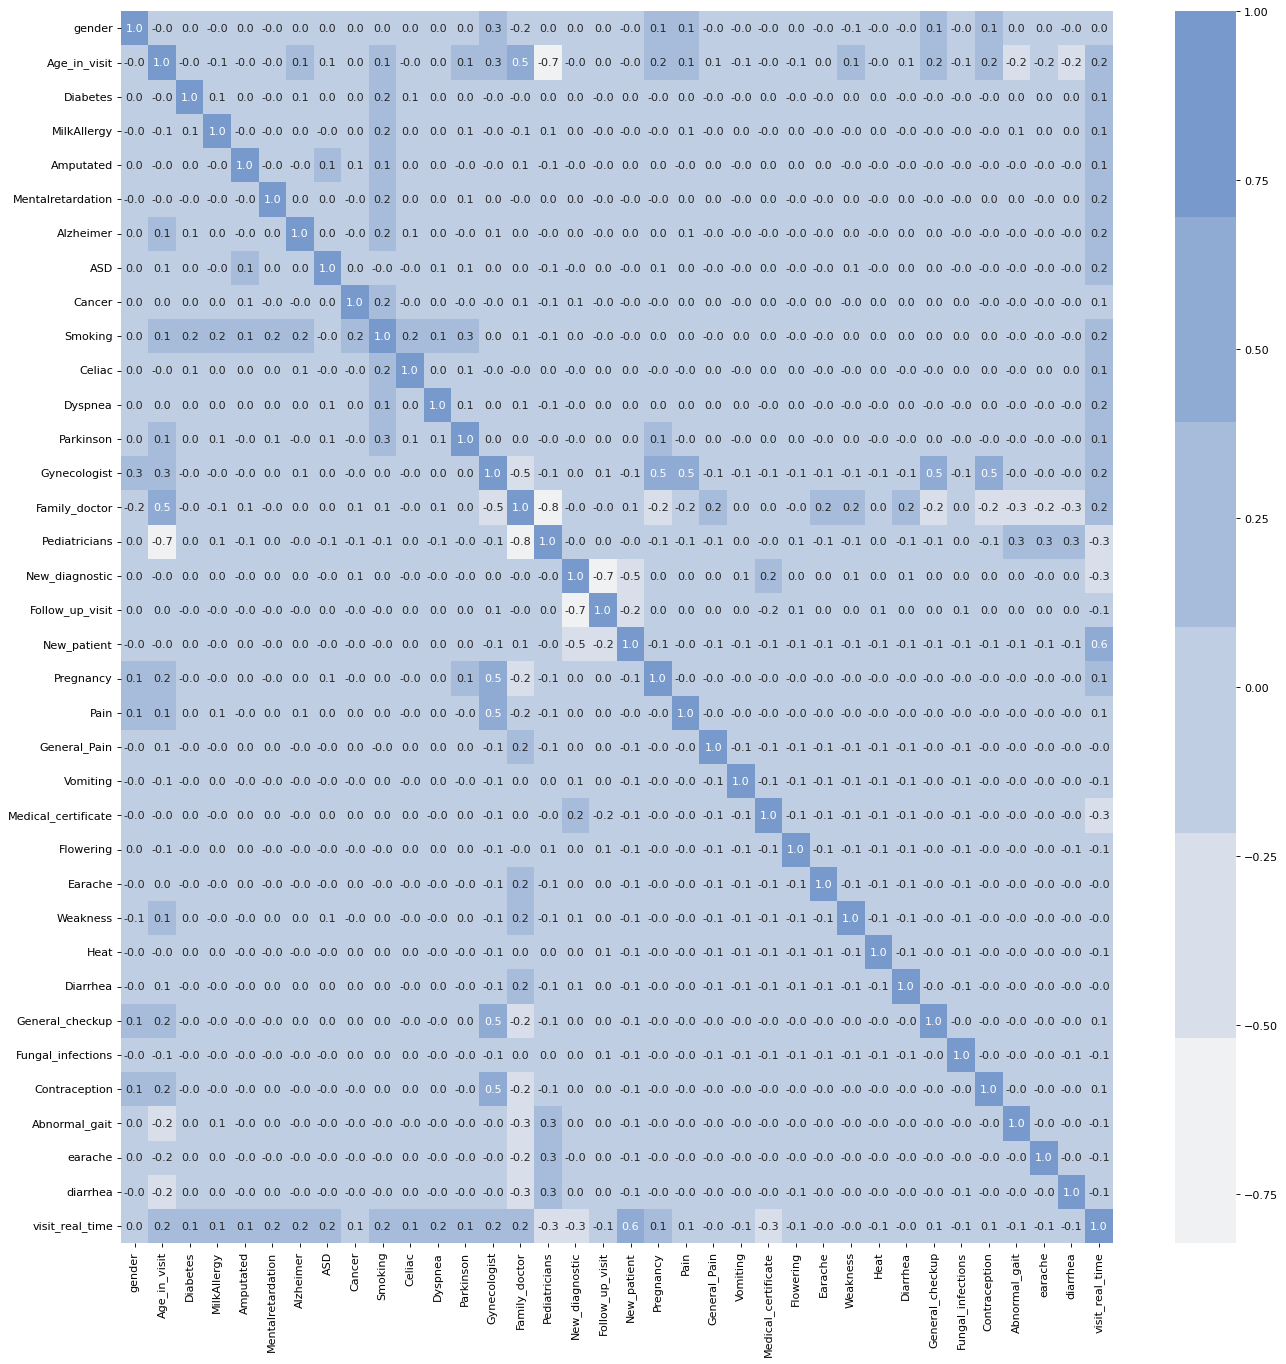

In [ ]:
target = 'visit_real_time'
fig, ax = plt.subplots(figsize=(20, 20), dpi=80)
ax = sns.heatmap(pd.concat([updated_df2.drop(target,axis=1),
                            updated_df2[target]],
                           axis=1).corr(),
                 annot=True,
                 fmt=".1f",
                 cmap=sns.light_palette("#79C"))
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor

X = updated_df2.drop('visit_real_time', axis=1)
y = updated_df2.visit_real_time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
y_test_actual = y_test

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_reg= SGDRegressor()
linear_reg.fit(X_train_scaled, y_train)

training_ridge = linear_reg.score(X_train_scaled,y_train)
print("training accuracy:  ",training_ridge )

accuracy_lasso = linear_reg.score(X_test_scaled,y_test)
print("accuracy: ",accuracy_lasso)

training accuracy:   0.6627011646567249
accuracy:  0.6821270857213313
